In [80]:
import requests
import json
from pprint import pprint
import pandas as pd
import matplotlib as plt
from config import api_key

In [81]:
headers = {'Authorization': 'Bearer %s' % api_key}

### When done this way it only pulls California so I tried another approach using states

In [82]:
# url='https://api.yelp.com/v3/businesses/search'
 
# # In the dictionary, term can take values like food, cafes or businesses like McDonalds
# params = {'location':'United States','limit':'5','term':'wineries'}
# # Making a get request to the API
# response=requests.get(url, params=params, headers=headers).json()
# pprint(response)




{'businesses': [{'alias': 'the-winery-sf-san-francisco',
                 'categories': [{'alias': 'venues',
                                 'title': 'Venues & Event Spaces'},
                                {'alias': 'winetastingroom',
                                 'title': 'Wine Tasting Room'}],
                 'coordinates': {'latitude': 37.818738,
                                 'longitude': -122.366406},
                 'display_phone': '(415) 735-8423',
                 'distance': 8901.861668954254,
                 'id': 'sqXS8wF3pbBEtWUV-ljewQ',
                 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/htdLPp6LAVmz5H_bq-P_NA/o.jpg',
                 'is_closed': False,
                 'location': {'address1': '30 Ave G',
                              'address2': '',
                              'address3': '',
                              'city': 'San Francisco',
                              'country': 'US',
                              'display_addres

### This will pull up to ten wineries per state, but the price (s_p) will not work so on all so I put a space for the empty ones

In [87]:
states = ['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','Florida','Georgia','Hawaii',
         ' Idaho','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota',
          'Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico'',New York','North Carolina',
          'North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina',
          'South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming']
url='https://api.yelp.com/v3/businesses/search'
s_name = []
s_city =[]
s_state = []
s_category =[]
s_p = []
s_rating=[]
s_review = []
lat = []
lng = []
j=0

for s in states:
    
    param = {'location':s,'limit':'10','term':'wineries'}
    responses=requests.get(url, params=param, headers=headers).json()
    j=0
    
    for bus in responses['businesses']:
        
        try:

            s_name.append(responses['businesses'][j]['name'])
            s_city.append(responses['businesses'][j]['location']['city'])
            s_state.append(responses['businesses'][j]['location']['state'])
            s_category.append(responses['businesses'][j]['categories'])
            s_rating.append(responses['businesses'][j]['rating'])
            s_review.append(responses['businesses'][j]['review_count'])
            s_p.append(responses['businesses'][j]['price'])
            lat.append(responses['businesses'][j]['coordinates']['latitude'])
            lng.append(responses['businesses'][j]['coordinates']['longitude'])
        except:
            lat.append("")
            lng.append("")
            s_p.append("")
        j+=1
            

    

df = pd.DataFrame({"Business Name":s_name,"City":s_city,"State":s_state,"Category":s_category,"Review Count":s_review,"Rating":s_rating,"Lat":lat,"Lng":lng, "Price":s_p})

df

,Business Name,City,State,Category,Review Count,Rating,Price,Lat,Lng
0,Ozan Vineyard & Winery,Calera,AL,"[{'alias': 'winetours', 'title': 'Wine Tours'}...",33,4.0,$$,33.1029,-86.7165
1,Cat-n-Bird Winery,Chelsea,AL,"[{'alias': 'wineries', 'title': 'Wineries'}, {...",20,5.0,$$,33.3509,-86.6544
2,Corbin Farms Winery,Calera,AL,"[{'alias': 'newamerican', 'title': 'American (...",44,4.5,$$,33.1758,-86.7752
3,Morgan Creek Vineyards,Harpersville,AL,"[{'alias': 'wineries', 'title': 'Wineries'}, {...",19,4.0,$$,33.3266,-86.4568
4,Hidden Meadow Vineyard,Jemison,AL,"[{'alias': 'winetastingroom', 'title': 'Wine T...",2,3.0,$,32.9599,-86.7478
...,...,...,...,...,...,...,...,...,...
369,The Village Cheese Shop,Wauwatosa,WI,"[{'alias': 'cheese', 'title': 'Cheese Shops'},...",17,4.5,$$,43.0502,-88.0082
370,Cooper's Hawk Winery & Restaurant - Brookfield,Brookfield,WI,"[{'alias': 'newamerican', 'title': 'American (...",354,4.0,$$$,43.0312,-88.1088
371,Sunshine Winery,Cedarburg,WI,"[{'alias': 'wineries', 'title': 'Wineries'}]",1,5.0,,,
372,Apple Works Winery,Germantown,WI,"[{'alias': 'wineries', 'title': 'Wineries'}]",4,4.0,,,


In [89]:
df.to_csv('df.csv')

In [91]:
df= pd.read_csv('df.csv')
df

,Unnamed: 0,Business Name,City,State,Category,Review Count,Rating,Price,Lat,Lng
0,0,Ozan Vineyard & Winery,Calera,AL,"[{'alias': 'winetours', 'title': 'Wine Tours'}...",33,4.0,$$,33.102898,-86.716510
1,1,Cat-n-Bird Winery,Chelsea,AL,"[{'alias': 'wineries', 'title': 'Wineries'}, {...",20,5.0,$$,33.350860,-86.654430
2,2,Corbin Farms Winery,Calera,AL,"[{'alias': 'newamerican', 'title': 'American (...",44,4.5,$$,33.175772,-86.775198
3,3,Morgan Creek Vineyards,Harpersville,AL,"[{'alias': 'wineries', 'title': 'Wineries'}, {...",19,4.0,$$,33.326640,-86.456760
4,4,Hidden Meadow Vineyard,Jemison,AL,"[{'alias': 'winetastingroom', 'title': 'Wine T...",2,3.0,$,32.959870,-86.747800
...,...,...,...,...,...,...,...,...,...,...
369,369,The Village Cheese Shop,Wauwatosa,WI,"[{'alias': 'cheese', 'title': 'Cheese Shops'},...",17,4.5,$$,43.050250,-88.008210
370,370,Cooper's Hawk Winery & Restaurant - Brookfield,Brookfield,WI,"[{'alias': 'newamerican', 'title': 'American (...",354,4.0,$$$,43.031227,-88.108790
371,371,Sunshine Winery,Cedarburg,WI,"[{'alias': 'wineries', 'title': 'Wineries'}]",1,5.0,,NaN,NaN
372,372,Apple Works Winery,Germantown,WI,"[{'alias': 'wineries', 'title': 'Wineries'}]",4,4.0,,NaN,NaN


In [92]:
df['Price Numerical'] =""
df

,Unnamed: 0,Business Name,City,State,Category,Review Count,Rating,Price,Lat,Lng,Price Numerical
0,0,Ozan Vineyard & Winery,Calera,AL,"[{'alias': 'winetours', 'title': 'Wine Tours'}...",33,4.0,$$,33.102898,-86.716510,
1,1,Cat-n-Bird Winery,Chelsea,AL,"[{'alias': 'wineries', 'title': 'Wineries'}, {...",20,5.0,$$,33.350860,-86.654430,
2,2,Corbin Farms Winery,Calera,AL,"[{'alias': 'newamerican', 'title': 'American (...",44,4.5,$$,33.175772,-86.775198,
3,3,Morgan Creek Vineyards,Harpersville,AL,"[{'alias': 'wineries', 'title': 'Wineries'}, {...",19,4.0,$$,33.326640,-86.456760,
4,4,Hidden Meadow Vineyard,Jemison,AL,"[{'alias': 'winetastingroom', 'title': 'Wine T...",2,3.0,$,32.959870,-86.747800,
...,...,...,...,...,...,...,...,...,...,...,...
369,369,The Village Cheese Shop,Wauwatosa,WI,"[{'alias': 'cheese', 'title': 'Cheese Shops'},...",17,4.5,$$,43.050250,-88.008210,
370,370,Cooper's Hawk Winery & Restaurant - Brookfield,Brookfield,WI,"[{'alias': 'newamerican', 'title': 'American (...",354,4.0,$$$,43.031227,-88.108790,
371,371,Sunshine Winery,Cedarburg,WI,"[{'alias': 'wineries', 'title': 'Wineries'}]",1,5.0,,NaN,NaN,
372,372,Apple Works Winery,Germantown,WI,"[{'alias': 'wineries', 'title': 'Wineries'}]",4,4.0,,NaN,NaN,


In [93]:
for index, row in s_wine_df.iterrows():
    if df.loc[index,'Price'] == " ":
        df.loc[index,'Price Numerical'] = 0
    elif df.loc[index,'Price'] == "$":
        df.loc[index,'Price Numerical'] = 1
    elif df.loc[index,'Price'] == "$$":
        df.loc[index,'Price Numerical'] = 2
    elif df.loc[index,'Price'] == "$$$":
        df.loc[index,'Price Numerical'] = 3
    elif df.loc[index,'Price'] == "$$$$":
        df.loc[index,'Price Numerical'] = 4
    else:
        df.loc[index,'Price Numerical'] = 5
df

,Unnamed: 0,Business Name,City,State,Category,Review Count,Rating,Price,Lat,Lng,Price Numerical
0,0,Ozan Vineyard & Winery,Calera,AL,"[{'alias': 'winetours', 'title': 'Wine Tours'}...",33,4.0,$$,33.102898,-86.716510,2
1,1,Cat-n-Bird Winery,Chelsea,AL,"[{'alias': 'wineries', 'title': 'Wineries'}, {...",20,5.0,$$,33.350860,-86.654430,2
2,2,Corbin Farms Winery,Calera,AL,"[{'alias': 'newamerican', 'title': 'American (...",44,4.5,$$,33.175772,-86.775198,2
3,3,Morgan Creek Vineyards,Harpersville,AL,"[{'alias': 'wineries', 'title': 'Wineries'}, {...",19,4.0,$$,33.326640,-86.456760,2
4,4,Hidden Meadow Vineyard,Jemison,AL,"[{'alias': 'winetastingroom', 'title': 'Wine T...",2,3.0,$,32.959870,-86.747800,1
...,...,...,...,...,...,...,...,...,...,...,...
369,369,The Village Cheese Shop,Wauwatosa,WI,"[{'alias': 'cheese', 'title': 'Cheese Shops'},...",17,4.5,$$,43.050250,-88.008210,2
370,370,Cooper's Hawk Winery & Restaurant - Brookfield,Brookfield,WI,"[{'alias': 'newamerican', 'title': 'American (...",354,4.0,$$$,43.031227,-88.108790,3
371,371,Sunshine Winery,Cedarburg,WI,"[{'alias': 'wineries', 'title': 'Wineries'}]",1,5.0,,NaN,NaN,0
372,372,Apple Works Winery,Germantown,WI,"[{'alias': 'wineries', 'title': 'Wineries'}]",4,4.0,,NaN,NaN,0


In [94]:
trim = df['Price'] != " "
trim_df = df[trim]
trim_df

,Unnamed: 0,Business Name,City,State,Category,Review Count,Rating,Price,Lat,Lng,Price Numerical
0,0,Ozan Vineyard & Winery,Calera,AL,"[{'alias': 'winetours', 'title': 'Wine Tours'}...",33,4.0,$$,33.102898,-86.716510,2
1,1,Cat-n-Bird Winery,Chelsea,AL,"[{'alias': 'wineries', 'title': 'Wineries'}, {...",20,5.0,$$,33.350860,-86.654430,2
2,2,Corbin Farms Winery,Calera,AL,"[{'alias': 'newamerican', 'title': 'American (...",44,4.5,$$,33.175772,-86.775198,2
3,3,Morgan Creek Vineyards,Harpersville,AL,"[{'alias': 'wineries', 'title': 'Wineries'}, {...",19,4.0,$$,33.326640,-86.456760,2
4,4,Hidden Meadow Vineyard,Jemison,AL,"[{'alias': 'winetastingroom', 'title': 'Wine T...",2,3.0,$,32.959870,-86.747800,1
...,...,...,...,...,...,...,...,...,...,...,...
367,367,Pieper Porch Winery & Vineyard,Mukwonago,WI,"[{'alias': 'winetastingroom', 'title': 'Wine T...",12,4.5,$$,42.921977,-88.314854,2
368,368,Two Brothers Wines,Richfield,WI,"[{'alias': 'wineries', 'title': 'Wineries'}, {...",13,5.0,$$,43.258337,-88.195680,2
369,369,The Village Cheese Shop,Wauwatosa,WI,"[{'alias': 'cheese', 'title': 'Cheese Shops'},...",17,4.5,$$,43.050250,-88.008210,2
370,370,Cooper's Hawk Winery & Restaurant - Brookfield,Brookfield,WI,"[{'alias': 'newamerican', 'title': 'American (...",354,4.0,$$$,43.031227,-88.108790,3


In [98]:
north = ['IL', 'IN', 'MI', 'MN', 'OH', 'WI']
northeast = ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA']
south = ['AR', 'LA', 'OK', 'TX', 'AL', 'FL', 'GA', 'MS', 'SC']
midsouth = ['DE', 'DC', 'KY', 'MD', 'NC', 'TN', 'VA', 'WV']
midwest = ['IA', 'KS', 'MO', 'NE', 'ND', 'SD']
west = ['CA', 'HI', 'NV', 'AZ', 'CO', 'ID', 'MT', 'NM', 'UT', 'WY']
northwest = ['OR', 'WA', 'AK']
trim_df['Region']=""

for index, r in trim_df.iterrows():
    if r['State'] in north:
        trim_df.loc[index,'Region'] = "N"
    elif r['State'] in northeast:
        trim_df.loc[index,'Region'] = "NE"
    elif r['State'] in south:
        trim_df.loc[index,'Region'] = "S"
    elif r['State'] in midsouth:
        trim_df.loc[index,'Region'] = "MS"
    elif r['State'] in midwest:
        trim_df.loc[index,'Region'] = "MW"
    elif r['State'] in west:
        trim_df.loc[index,'Region'] = "W"
    else:
        trim_df.loc[index,'Region'] = "NE"
    
    
trim_df

C:\Users\asiha\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\asiha\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Unnamed: 0,Business Name,City,State,Category,Review Count,Rating,Price,Lat,Lng,Price Numerical,Region
0,0,Ozan Vineyard & Winery,Calera,AL,"[{'alias': 'winetours', 'title': 'Wine Tours'}...",33,4.0,$$,33.102898,-86.716510,2,S
1,1,Cat-n-Bird Winery,Chelsea,AL,"[{'alias': 'wineries', 'title': 'Wineries'}, {...",20,5.0,$$,33.350860,-86.654430,2,S
2,2,Corbin Farms Winery,Calera,AL,"[{'alias': 'newamerican', 'title': 'American (...",44,4.5,$$,33.175772,-86.775198,2,S
3,3,Morgan Creek Vineyards,Harpersville,AL,"[{'alias': 'wineries', 'title': 'Wineries'}, {...",19,4.0,$$,33.326640,-86.456760,2,S
4,4,Hidden Meadow Vineyard,Jemison,AL,"[{'alias': 'winetastingroom', 'title': 'Wine T...",2,3.0,$,32.959870,-86.747800,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...
367,367,Pieper Porch Winery & Vineyard,Mukwonago,WI,"[{'alias': 'winetastingroom', 'title': 'Wine T...",12,4.5,$$,42.921977,-88.314854,2,N
368,368,Two Brothers Wines,Richfield,WI,"[{'alias': 'wineries', 'title': 'Wineries'}, {...",13,5.0,$$,43.258337,-88.195680,2,N
369,369,The Village Cheese Shop,Wauwatosa,WI,"[{'alias': 'cheese', 'title': 'Cheese Shops'},...",17,4.5,$$,43.050250,-88.008210,2,N
370,370,Cooper's Hawk Winery & Restaurant - Brookfield,Brookfield,WI,"[{'alias': 'newamerican', 'title': 'American (...",354,4.0,$$$,43.031227,-88.108790,3,N


In [34]:
# def reg_line(x_axis, y_axis,x,y):
#     print(f"The r-squared is {(st.pearsonr(x_axis,y_axis)[0])**2}")
#     m_slope, m_int, m_r, m_p, m_std_err = st.linregress(x_axis, y_axis)
#     m_fit = m_slope * x_axis + m_int
#     plt.plot(x_axis,m_fit,"r-")
#     line_eq = "y = " + str(round(m_slope,2)) + "x + " + str(round(m_int,2))
#     plt.annotate(line_eq,(x,y),fontsize=15,color="red")

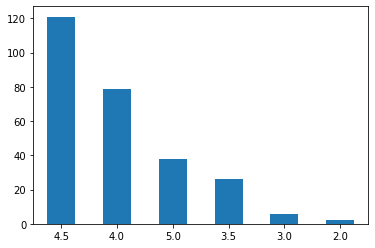

In [62]:
rate = trim_df['Rating'].value_counts()
rate.plot( kind='bar', rot=0)



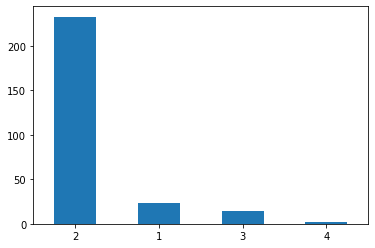

In [84]:
price = trim_df['Price Numerical'].value_counts()
price.plot(kind='bar',rot=0)


AttributeError: module 'matplotlib' has no attribute 'xlabel'

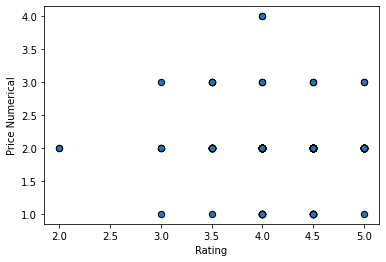

In [85]:
rate_price= trim_df[['Rating','Price Numerical']]
rate_price.plot('Rating', 'Price Numerical',kind='scatter',marker="o",edgecolor='k',s=40)
plt.xlabel('Rating')
plt.ylabel('Review Count')
plt.title('Rating vs. Review Count')
plt.show()

AttributeError: module 'matplotlib' has no attribute 'xlabel'

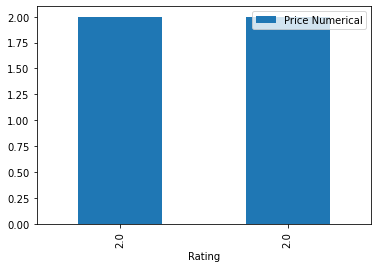

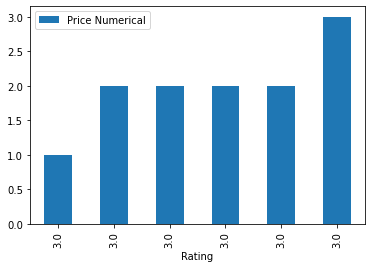

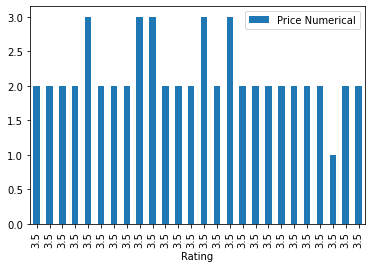

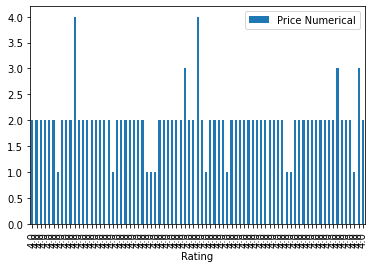

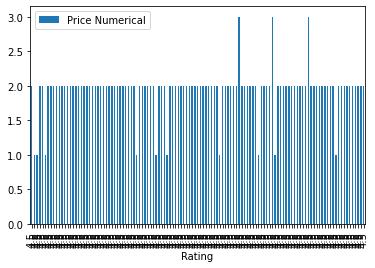

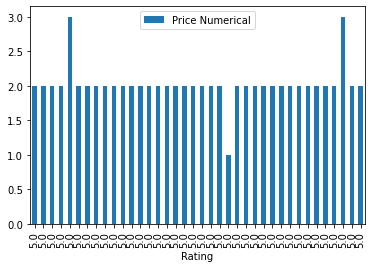

In [76]:
rate_price= trim_df[['Rating','Price Numerical']].groupby('Rating')

rate_price.plot('Rating','Price Numerical', kind='bar')
plt.xlabel('Rating')
plt.ylabel('Review Count')
plt.title('Rating vs. Review Count')
plt.show()

In [ ]:
rate = trim_df['Rating'].value_counts()
rate.plot( kind='bar', rot=0)
price = trim_df['Price Numerical'].value_counts()
price.plot(kind='bar',rot=0)

AttributeError: module 'matplotlib' has no attribute 'xlabel'

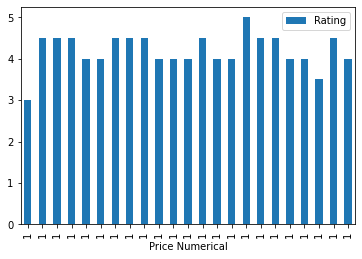

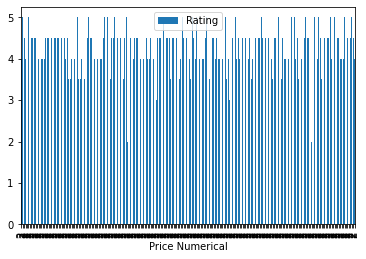

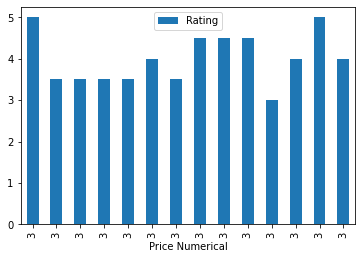

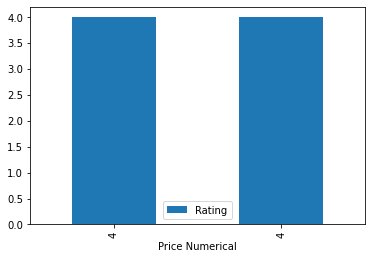

In [79]:
rate_price= trim_df[['Rating','Price Numerical']].groupby('Price Numerical')

rate_price.plot('Price Numerical','Rating', kind='bar')
plt.xlabel('Rating')
plt.ylabel('Review Count')
plt.title('Rating vs. Review Count')
plt.show()

In [ ]:
# north = ['Illinois', 'Indiana', 'Michigan', 'Minnesota', 'Ohio', 'Wisconsin']
# northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania']
# south = ['Arkansas', 'Louisiana', 'Oklahoma', 'Texas', 'Alabama', 'Florida', 'Georgia', 'Mississippi', 'South Carolina']
# midsouth = ['Delaware', 'District of Columbia', 'Kentucky', 'Maryland', 'North Carolina', 'Tennessee', 'Virginia', 'West Virginia']
# midwest = ['Iowa', 'Kansas', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota']
# west = ['California', 'Hawaii', 'Nevada', 'Arizona', 'Colorado', 'Idaho', 'Montana', 'New Mexico', 'Utah', 'Wyoming']
# northwest = ['Oregon', 'Washington', 'Alaska']

In [ ]:
north = ['IL', 'IN', 'MI', 'MN', 'OH', 'WI']
northeast = ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA']
south = ['AR', 'LA', 'OK', 'TX', 'AL', 'FL', 'GA', 'MS', 'SC']
midsouth = ['DE', 'DC', 'KY', 'MD', 'NC', 'TN', 'VA', 'WV']
midwest = ['IA', 'KS', 'MO', 'NE', 'ND', 'SD']
west = ['CA', 'HI', 'NV', 'AZ', 'CO', 'ID', 'MT', 'NM', 'UT', 'WY']
northwest = ['OR', 'WA', 'AK']
